In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from Classifiers import *
from gen_dataset import gen_dataset
from plot_2d_res import plot_2d_res

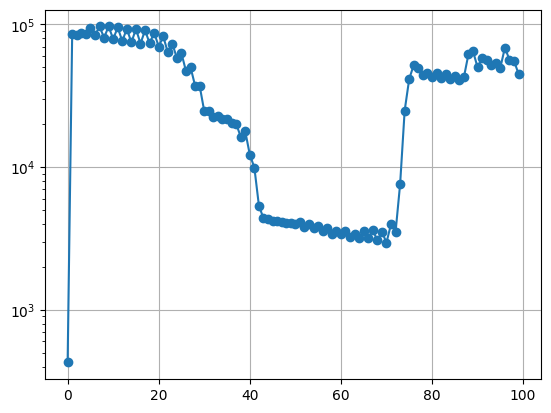

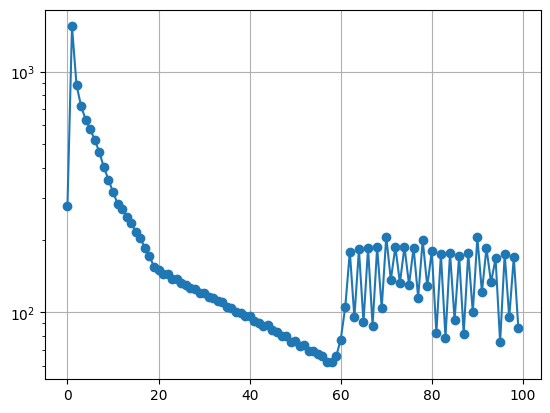

In [ ]:
classes_numb = 4 # Число классов (targets): 0, 1, 2, ...
obj_numb = 200 # Число объектов для каждого класса
w_numb = 2 # Число признаков (weights) - отрисовка и генерация работает только для двух признаков
iter_num = 100  # Число итераций обучения


# Генерация исходных объектов
x1_center = np.array([-5, -5, 5, 5]) # Центры первого признака
x2_center = np.array([-5, 5, -5, 5]) # Центры второго признака
deviation = np.array([1, 1, 1, 1]) # Отклонения признаков
scale = 2 # Уровень шума
x, ref_y = gen_dataset(classes_numb=classes_numb, obj_numb=obj_numb, x1_center=x1_center, \
                x2_center=x2_center, deviation=deviation, scale=scale)


# Создание тренировочной и тестовой выборок
train_x, test_x, train_y, test_y = train_test_split(x.T, ref_y, test_size=0.3, stratify=ref_y, random_state=1)
train_x, test_x = train_x.T, test_x.T


# Определение начальных значений коэффициентов и классификаторов
bias = np.random.normal(0, 0.1)
weights = np.random.normal(0, 0.1, w_numb)

# ova_classifier = OneVsAllClassifier(LinearClassifier, classes_numb, bias, weights)
ova_classifier = OneVsAllClassifier(SupportVectorMachine, classes_numb, bias, weights)
# ova_classifier = OneVsAllClassifier(LogisticRegression, classes_numb, bias, weights)

# ava_classifier = AllVsAllClassifier(LinearClassifier, classes_numb, bias, weights)
ava_classifier = AllVsAllClassifier(SupportVectorMachine, classes_numb, bias, weights)
# ava_classifier = AllVsAllClassifier(LogisticRegression, classes_numb, bias, weights)


# Тренировка моделей
ova_loss = []
ava_loss = []

for i in range(iter_num):
    loss = ova_classifier.train(train_x, train_y)
    ova_loss.append(loss)
    loss = ava_classifier.train(train_x, train_y)
    ava_loss.append(loss)



# Отображение функции потерь
plt.figure(1)
plt.plot(ova_loss,'-o')
plt.yscale("log")
plt.grid(True)

plt.figure(2)
plt.plot(ava_loss,'-o')
plt.yscale("log")
plt.grid(True)

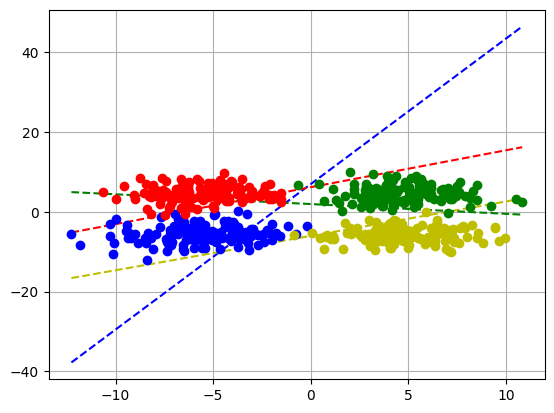

In [55]:
# Отрисовка результирующих прямых классификатора один против всех и обучающей выборки
if (w_numb == 2):
    min_x = x.min()
    max_x = x.max()

    step = 0.1
    plot_x = np.arange(min_x, max_x, step)

    plot_y = np.empty((classes_numb, len(plot_x)))
    for i in range(classes_numb):
        w = ova_classifier.classifiers[i].weights_with_bias
        plot_y[i, :] = -w[0]/w[2] - w[1]/w[2] * plot_x

    plt.figure(10)
    plt.plot(plot_x, plot_y[0, :], 'b--')
    plt.plot(plot_x, plot_y[1, :], 'r--');
    if (classes_numb > 2):
        plt.plot(plot_x, plot_y[2, :], 'y--');
    if (classes_numb > 3):
        plt.plot(plot_x, plot_y[3, :], 'g--');


    plot_2d_res(train_x, train_y, classes_numb)

In [56]:
# Расчет метрики Accuracy для классификаторов 
class_y = ova_classifier.classify(test_x)
ova_accuracy = np.mean(class_y == test_y)
print(f"OvA Accuracy: {ova_accuracy:.2f}")

class_y = ava_classifier.classify(test_x)
ava_accuracy = np.mean(class_y == test_y)
print(f"AvA Accuracy: {ava_accuracy:.2f}")

OvA Accuracy: 0.72
AvA Accuracy: 0.98


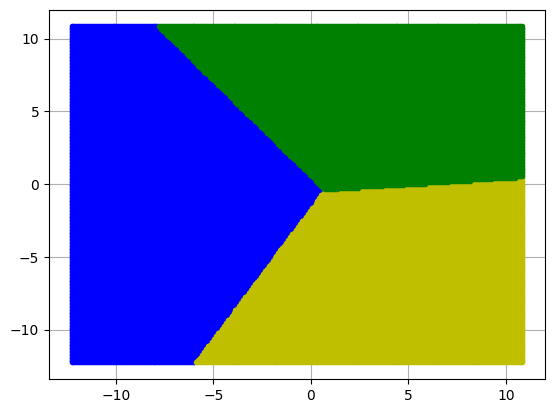

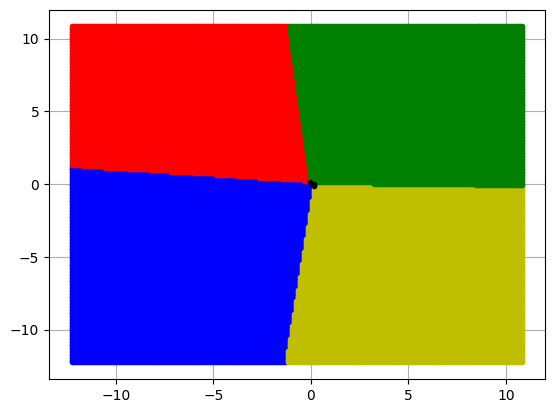

In [57]:
# Отрисовка сетки решений для классификаторов
if (w_numb == 2):
    min_x = x.min()
    max_x = x.max()

    step = 0.1


    diag_x = np.arange(min_x, max_x, step)
    grid_x = np.empty((2, diag_x.size * diag_x.size))
    grid_x[0, :] = np.tile(diag_x, (1, diag_x.size))
    grid_x[1, :] = np.repeat(diag_x, diag_x.size)


    ova_grid_y = ova_classifier.classify(grid_x)
    plt.figure(30)
    plot_2d_res(grid_x, ova_grid_y, classes_numb, 1)


    ava_grid_y = ava_classifier.classify(grid_x)
    plt.figure(31)
    plot_2d_res(grid_x, ava_grid_y, classes_numb, 1, 1)